In [68]:
import time

import matplotlib.pyplot as plt
import keras
import os
from scipy.special import softmax

In [41]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [4]:
affective_model = keras.models.load_model("data/AffectInceptionResNetV3.keras")

In [72]:
base_path_structured = "/Users/benhoskings/Documents/Datasets/FusionV2"
train_path_structured = os.path.join(base_path_structured, "train_set")

class_names = ["Negative", "Neutral", "Positive"]
# class_names = ["Anger", "Disgust", "Happy", "Neutral", "Fear", "Sad", "Surprise"]
batch_size = 128
image_shape = (224, 224, 3)

train_ds = keras.utils.image_dataset_from_directory(
    train_path_structured, 
    class_names=class_names,
    label_mode="categorical", 
    labels="inferred",
    batch_size=batch_size,
    image_size=image_shape[0:2],
    seed=101)

val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(base_path_structured, "val_set"), 
    class_names=class_names,
    label_mode="categorical", 
    labels="inferred",
    batch_size=16,
    image_size=image_shape[0:2],
    seed=101, 
    shuffle=False)

Found 235695 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


In [73]:
print("Evaluate")
# result = affective_model.evaluate(val_ds)
# print(dict(zip(affective_model.metrics_names, result)))
start = time.monotonic()
predictions = affective_model.predict(val_ds)
print(f"Avg prediction time: {(time.monotonic() - start) / 1500}s")

Evaluate
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 254ms/step
Avg prediction time: 0.015932193888661763s


In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn

pred_classes = np.argmax(predictions, axis=1)
print(pred_classes)
true_categories = np.concatenate([y for x, y in val_ds], axis=0)
print(np.argmax(true_categories, axis=1))

[1 1 0 ... 1 2 2]
[0 0 0 ... 2 2 2]


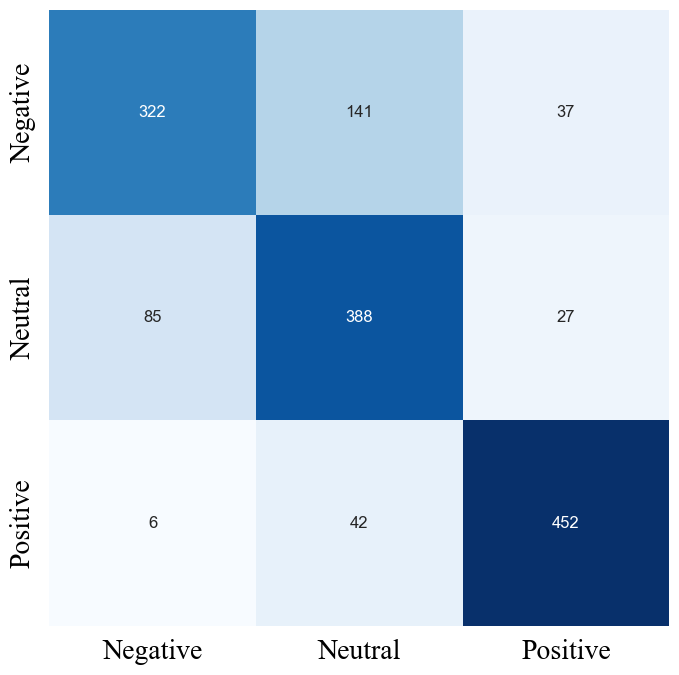

In [57]:
font_dict={'size': 20, 'color': 'black', "family": "serif", "name": "Times New Roman"}
cm = confusion_matrix(y_true=np.argmax(true_categories, axis=1), y_pred=pred_classes)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
seaborn.set(font_scale=1.4) #for label size
seaborn.heatmap(cm, annot=True, annot_kws={"size": 12}, cbar = False, cmap='Blues', fmt='d')
ax1.set_yticklabels(class_names, fontdict=font_dict)
ax1.set_xticklabels(class_names, fontdict=font_dict)
# ax1.set_ylabel('True Values', fontdict=font_dict)
# ax1.set_xlabel('Predicted Values',fontsize=14)

plt.savefig("confusion_matrix.png", bbox_inches='tight')
plt.show()

In [65]:
img = keras.utils.load_img("sample_images/anger-01.png", target_size=image_shape[:2])

img_array = keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, 0) # Create a batch

predictions = affective_model.predict(img_array, verbose=0)

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(softmax(predictions)))
)

This image most likely belongs to Negative with a 100.00 percent confidence.


Found 1500 files belonging to 3 classes.


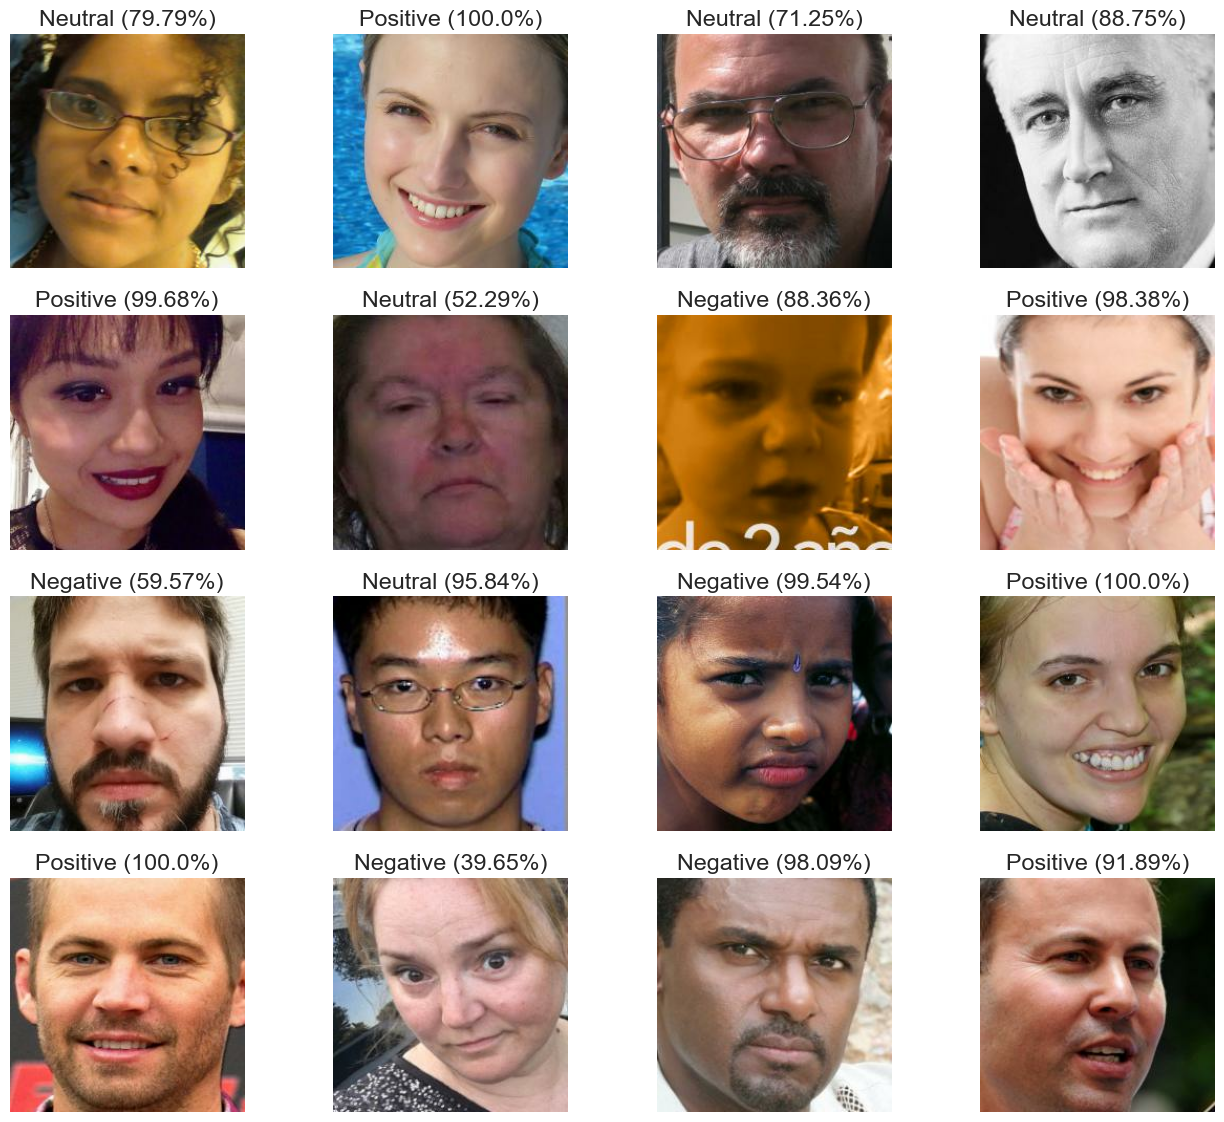

In [66]:
fig = plt.figure(figsize=(16, 14))

val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(base_path_structured, "val_set"), 
    class_names=class_names,
    label_mode="categorical", 
    labels="inferred",
    batch_size=batch_size,
    image_size=image_shape[0:2],
    seed=101, 
    shuffle=True)

# fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        image = images[i+64].numpy().astype("uint8")
        img_array = keras.utils.img_to_array(image)
        img_array = np.expand_dims(img_array, 0) # Create a batch

        plt.imshow(image)
        predictions = affective_model.predict(img_array, verbose=0)
        plt.title(f"{class_names[np.argmax(predictions)]} ({np.round(100*np.max(softmax(predictions)), 2)}%)")
        plt.axis("off")
        
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.savefig("affective_predictions.png", bbox_inches='tight')